In [6]:
# keras, MNIST dataSets
# 로드 MNIST 28x28
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


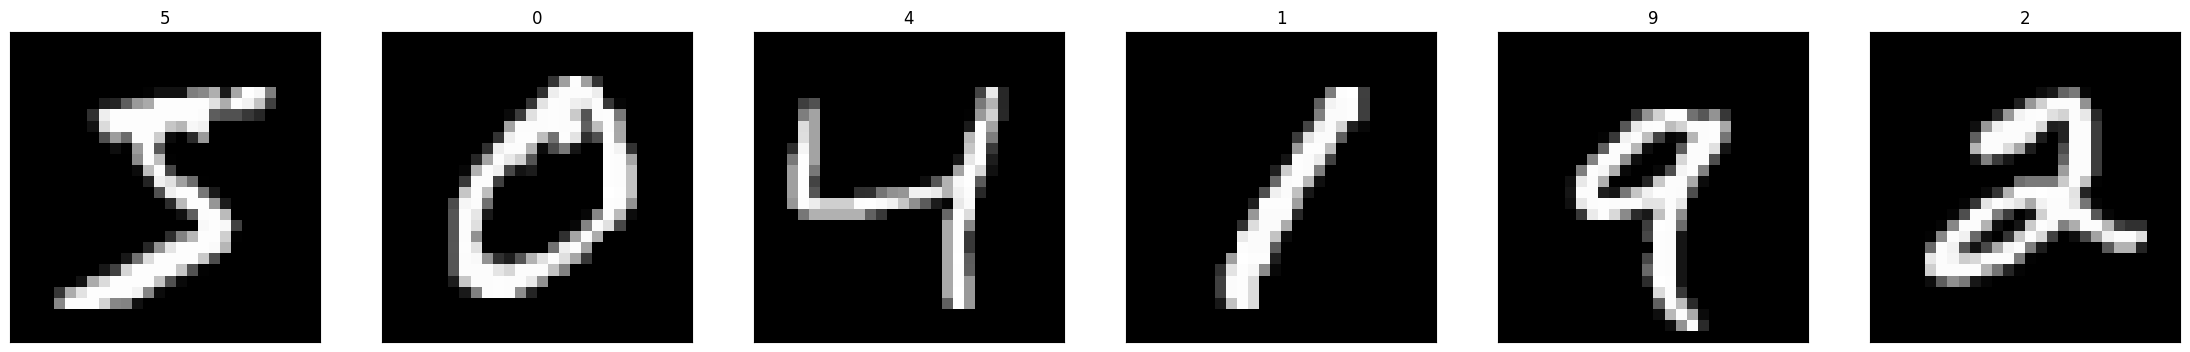

In [7]:
# visiualize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(28, 28))

for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(y_train[i])

In [8]:
print(X_train.shape)
print(y_train)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


28 28


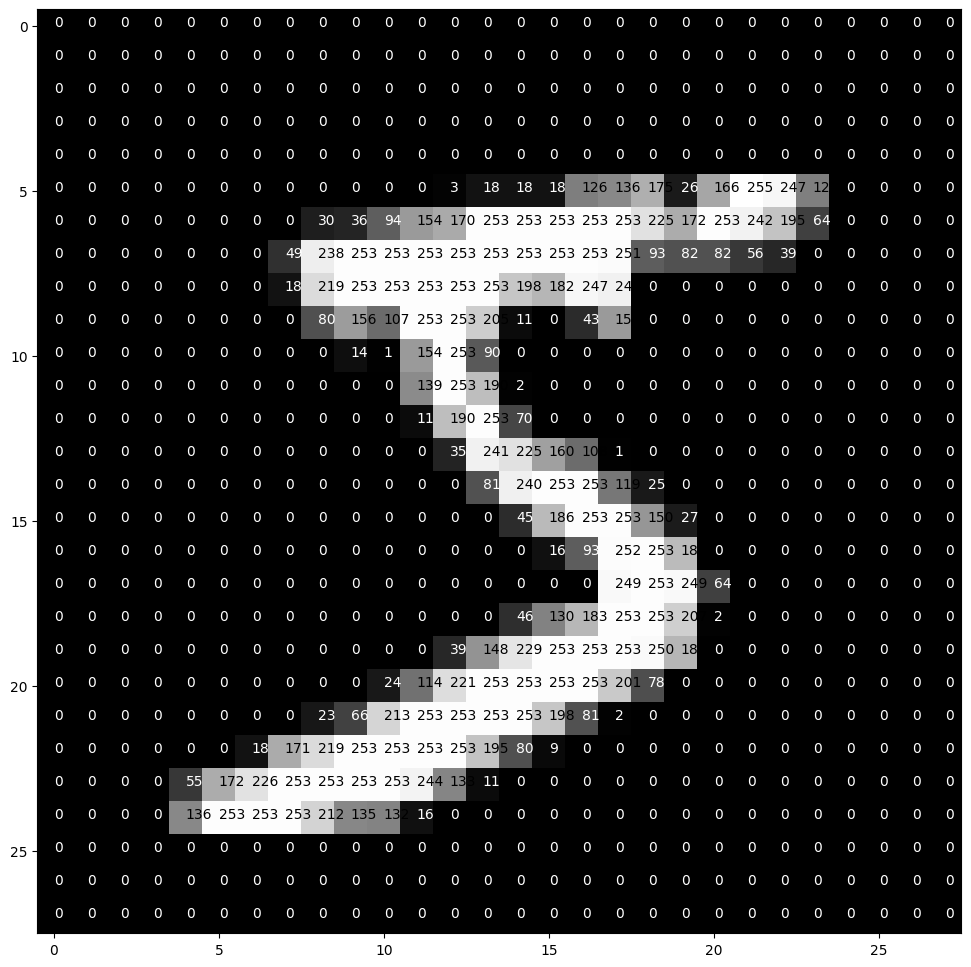

In [9]:
fig = plt.figure(figsize=(12, 12))
ax=fig.add_subplot(111)
img=X_train[0]

ax.imshow(img, cmap='gray')
width, height = img.shape
print(width, height)
thresh=img.max()/2.5
for x in range(width):
    for y in range(height):
        ax.annotate(img[x][y],
                     xy=(y, x),
                     color='white' if img[x][y] < thresh else 'black')

In [10]:
# 전처리 0~255 -> 0~1
mean = np.mean(X_train)
std = np.std(X_train)
print(mean, std)

X_train=(X_train - mean)/(std+1e-7)
X_test=(X_test - mean)/(std+1e-7)

print(X_train.shape)
print(X_train[0])

33.318421449829934 78.56748998339798
(60000, 28, 28)
[[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42

In [11]:
# 라벨을 integer label
import np_utils
from tensorflow.keras.utils import to_categorical

num_classes = 10
print(y_train[0:10])

y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
print(y_train[0:10])
print(y_train.shape)

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 10)


In [12]:
#input 28x28
img_rows, img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape=(img_rows, img_cols, 1)

print(input_shape)
print(X_train.shape)

(28, 28, 1)
(60000, 28, 28, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

# 1
model.add(
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape = input_shape, padding='same')
)
model.add(
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
)
# 2
model.add(
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')
)
model.add(
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
)
# 3
model.add(
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')
)

# flatten
model.add(Flatten())
# Dense
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               

In [14]:
import tensorflow as tf

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

#Learning Rate
def lr_schedule(epoch):
    if epoch <= 2:
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch>5 and epoch <= 9:
        lr = 5e-5
    else:
        lr = 1e-5

    return lr

lr_schedule = LearningRateScheduler(lr_schedule)

checkpoint = ModelCheckpoint(
    filepath='model.weights.best.hdf5',
    verbose=1,
    save_best_only=True
)

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

#train
hist=model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test,y_test),
    callbacks=[checkpoint,lr_schedule],
    verbose=2,
    shuffle=True
)
print(hist)

Epoch 1/20



Epoch 1: val_loss improved from inf to 1.35235, saving model to model.weights.best.hdf5
1875/1875 - 7s - loss: 1.8685 - accuracy: 0.5612 - val_loss: 1.3524 - val_accuracy: 0.7311 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 2/20


c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.35235 to 0.81767, saving model to model.weights.best.hdf5
1875/1875 - 6s - loss: 1.0542 - accuracy: 0.7727 - val_loss: 0.8177 - val_accuracy: 0.8190 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.81767 to 0.62301, saving model to model.weights.best.hdf5
1875/1875 - 6s - loss: 0.7262 - accuracy: 0.8303 - val_loss: 0.6230 - val_accuracy: 0.8571 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.62301 to 0.57737, saving model to model.weights.best.hdf5
1875/1875 - 6s - loss: 0.6173 - accuracy: 0.8511 - val_loss: 0.5774 - val_accuracy: 0.8639 - lr: 2.0000e-04 - 6s/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.57737 to 0.54124, saving model to model.weights.best.hdf5
1875/1875 - 6s - loss: 0.5762 - accuracy: 0.8588 - val_loss: 0.5412 - val_accuracy: 0.8690 - lr: 2.0000e-04 - 6s/epoch - 3ms/step
Epoch 6/20

Epoch 6: val_loss improved from 0.54124 to 0.51181, saving mode

In [16]:
model.load_weights('model.weights.best.hdf5')

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
accuracy=score[1]*100
print(accuracy)

[0.4765393137931824, 0.878600001335144]
87.8600001335144


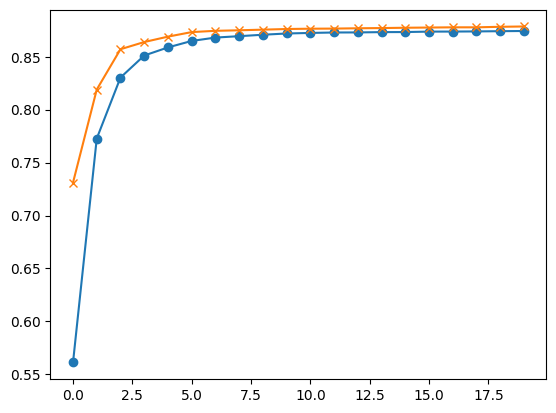

In [18]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot(hist.history['accuracy'], 'o-')
ax.plot(hist.history['val_accuracy'], 'x-')

plt.show()

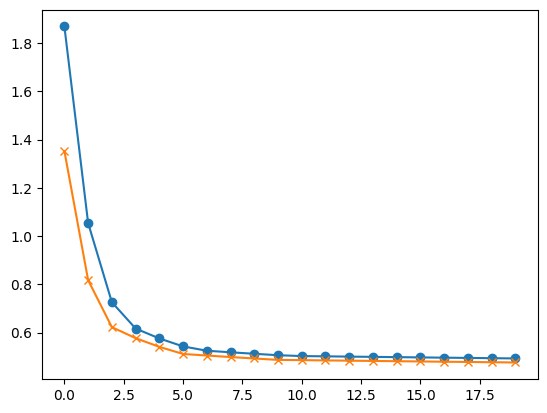

In [19]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot(hist.history['loss'], 'o-')
ax.plot(hist.history['val_loss'], 'x-')

plt.show()